In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
path = '/content/drive/Shareddrives/Interview Preparation/Data Science/Parkinson disease/data/'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import widgets
import plotly.graph_objects as go

# Train Peptides

In [4]:
train_peptides = pd.read_csv(path+'train_peptides.csv')
print(train_peptides.shape)
train_peptides

(981834, 6)


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


##### Plot Number of Records for each Patients

Number of Patients:  248




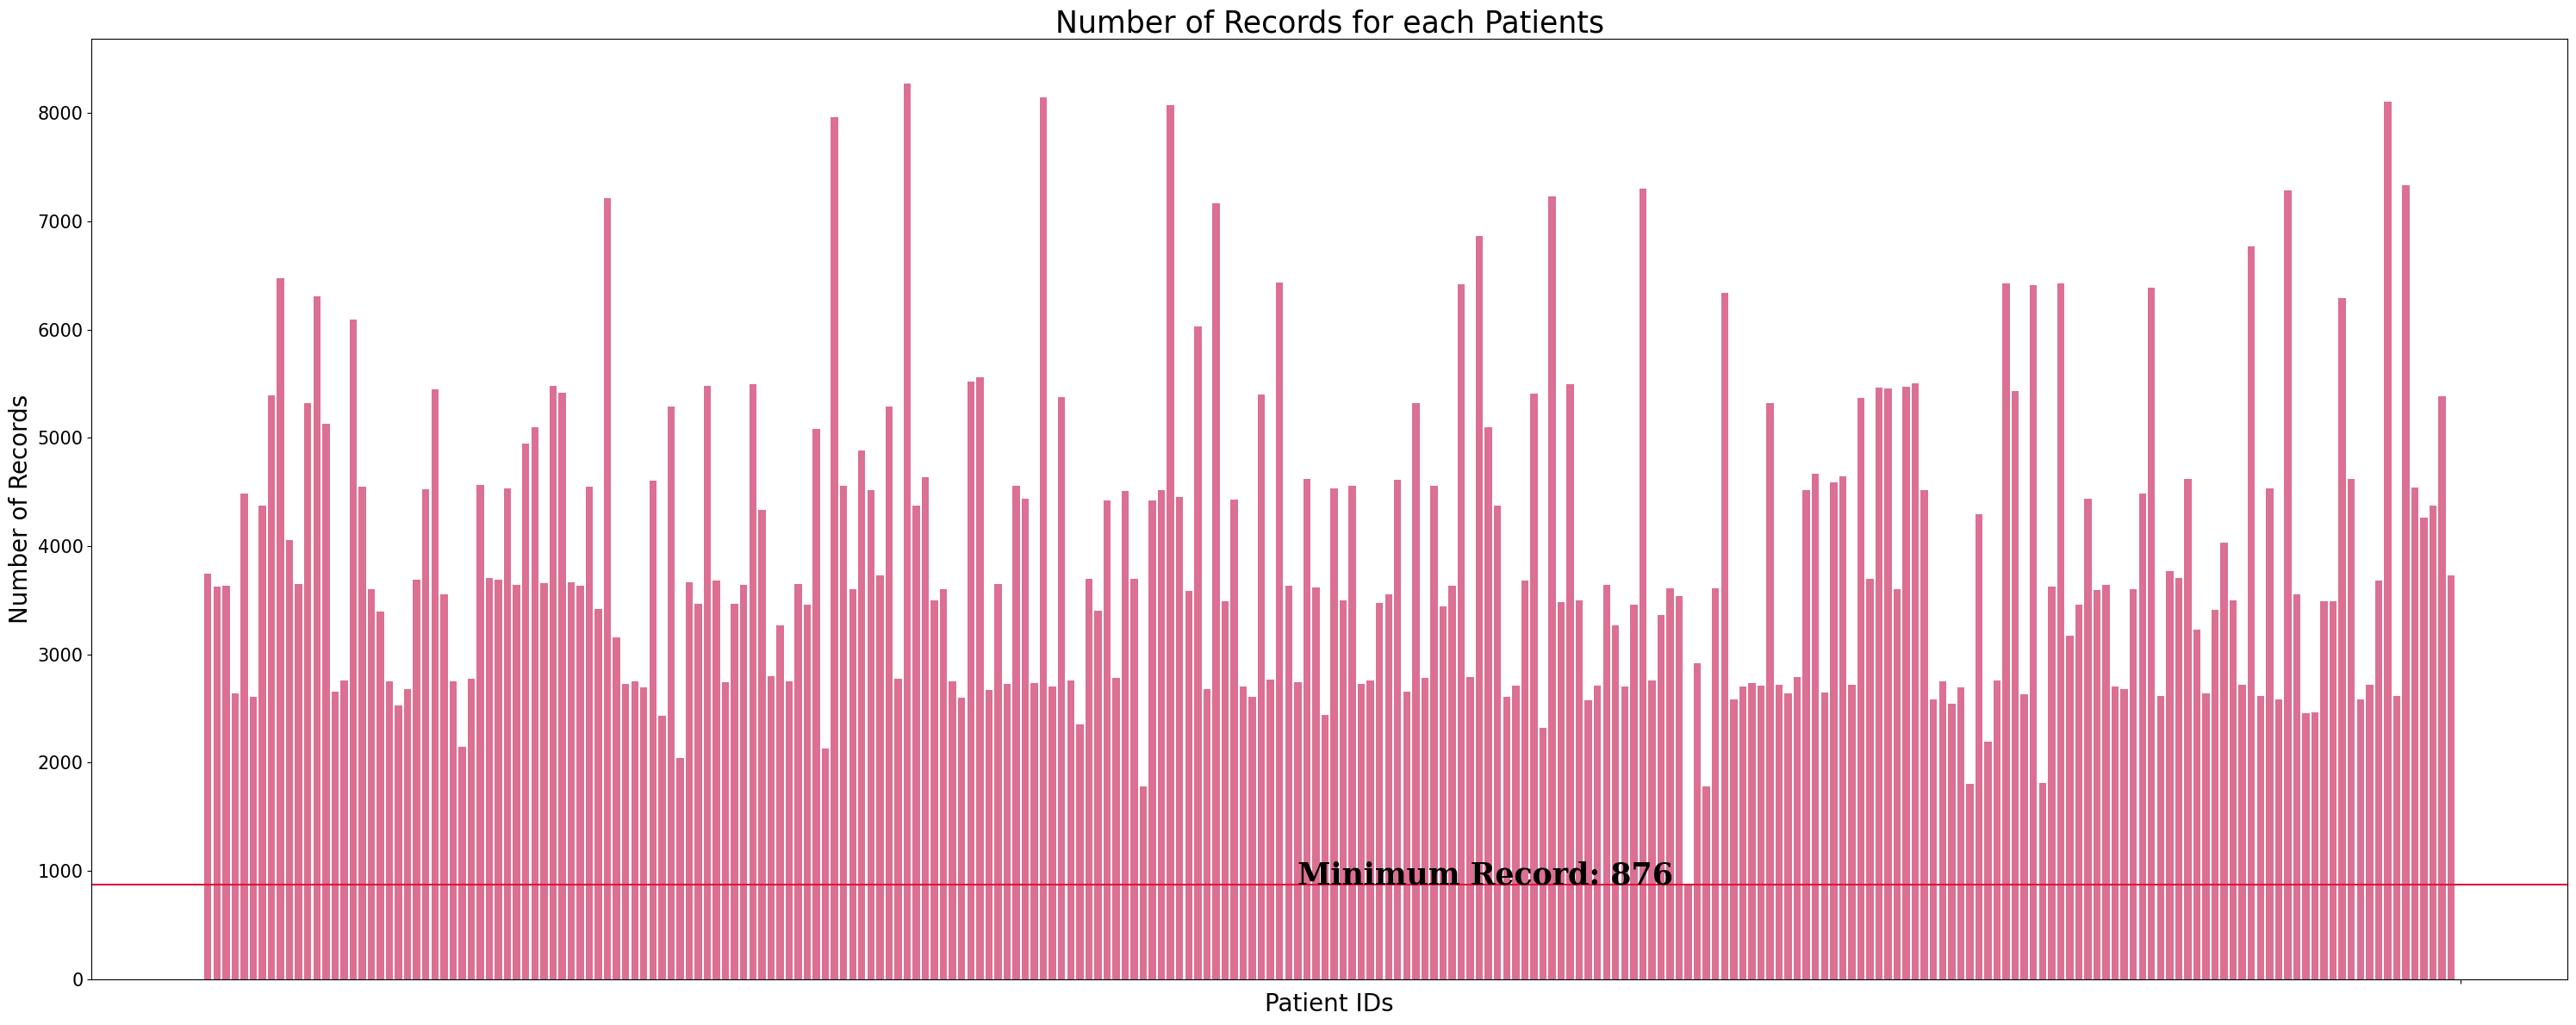

In [5]:
id, id_freq = np.unique(train_peptides['patient_id'], return_counts=True)
print('Number of Patients: ',len(id))
print('\n')

# Plot
fig,ax = plt.subplots(figsize=(30,12))
plt.bar(id.astype(str), id_freq, color='palevioletred')
plt.axhline(id_freq.min(), color='crimson')
plt.text(120,id_freq.min(),'Minimum Record: '+str(id_freq.min()), fontsize=25, fontweight='heavy', family='serif')

plt.xlabel('Patient IDs', fontsize=20)
plt.ylabel('Number of Records', fontsize=20)
plt.title('Number of Records for each Patients',fontsize=25)
plt.xticks('')
ax.tick_params(labelsize=15)

plt.tight_layout()
plt.show()

In [ ]:
id_str = list(map(str, id))

# Create bar chart
fig = go.Figure(go.Bar(
        x=id_str,
        y=id_freq,
        marker=dict(color='teal'),
        width=0.7))


# Add labels over bars
fig.update_layout(
    title={'text' : 'Number of Records for each Patients', 'font' : {'size':24}},
    xaxis_title='Patient IDs',
    yaxis_title='Number of Records',
    showlegend=False,
    xaxis=dict(showgrid=False, tickvals=[], titlefont=dict(size=18)),
    yaxis=dict(showgrid=False, tickfont_size=14, titlefont=dict(size=18)),
    width=1400,  # Change the width of the graph
    plot_bgcolor='white')

# Show figure
fig.show()


##### Plot visit months of all the Patients

In [ ]:
month, month_freq = np.unique(train_peptides['visit_month'], return_counts = 1)
month_str = list(map(str, month))

# Create bar chart
fig = go.Figure(go.Bar(
        x=month_str,
        y=month_freq,
        marker=dict(color='teal'),
        width=0.7))


# Add labels over bars
fig.update_layout(
    title={'text' : 'Frequency of visits', 'font' : {'size':24}},
    xaxis_title='Months',
    yaxis_title='',
    showlegend=False,
    xaxis=dict(showgrid=False, tickfont_size=14, titlefont=dict(size=18)),
    yaxis=dict(showgrid=False, tickfont_size=14),
    width=1000,  # Change the width of the graph
    plot_bgcolor='white')

# Show figure
fig.show()

In [ ]:
#### filtered_peptides_data
dropdown_root = widgets.Dropdown(options = train_peptides.patient_id.sort_values().unique(),
value=train_peptides.patient_id[0], description = "Patient Id: ",)

output_df_unique = widgets.Output()

def unique_value_counts(patient_id):
  output_df_unique.clear_output()
  ot = train_peptides[train_peptides["patient_id"] == patient_id]
  with output_df_unique:
    display(ot)

def dropdown_root_c_eventhandler(change):
    unique_value_counts(dropdown_root.value)

dropdown_root.observe(dropdown_root_c_eventhandler, names='value')
unique_hbox = widgets.HBox([dropdown_root])
filtered_peptides_data = widgets.VBox([unique_hbox, output_df_unique])

In [ ]:
#### peptides describe tab
dropdown_root_d = widgets.Dropdown ( options = train_peptides.patient_id.sort_values().unique(),
value=train_peptides.patient_id[0], description = "Patient Id: ",)

output_df_describe = widgets.Output()

def describe_for_patient(patient_id):
  output_df_describe.clear_output()
  ot = train_peptides[train_peptides["patient_id"] == patient_id]
  with output_df_describe:
    print(ot.visit_month.unique())
    print(ot.describe(include='all').T)

def dropdown_root_d_eventhandler(change):
    describe_for_patient(dropdown_root_d.value)

dropdown_root_d.observe(dropdown_root_d_eventhandler, names='value')
unique_hbox_d = widgets.HBox([dropdown_root_d])
peptides_data_describe = widgets.VBox([unique_hbox_d, output_df_describe])

In [ ]:
###Filter by patient and UniProt
dropdown_root_p = widgets.Dropdown ( options = train_peptides.patient_id.sort_values().unique(),
value=train_peptides.patient_id[0], description = "Patient Id: ",)

dropdown_uniprot_p = widgets.Dropdown ( options = train_peptides.UniProt.sort_values().unique(),
value=train_peptides.UniProt[0], description = "UniProt: ",)

output_df_uniprot = widgets.Output()

def filter_by_uniprot(patient_id,uniprot):
  output_df_uniprot.clear_output()
  ot = train_peptides[(train_peptides["patient_id"] == patient_id) & (train_peptides["UniProt"] == uniprot)]
  #ot = ot.pivot(index=["visit_id","visit_month","patient_id","UniProt"],columns="Peptide",values="PeptideAbundance").reset_index()
  #ot = ot.dropna(axis = 1, how = 'all')
  with output_df_uniprot:
    display(ot)

def dropdown_root_p_eventhandler(change):
    filter_by_uniprot(change.new,dropdown_uniprot_p.value)

def dropdown_uniprot_p_eventhandler(change):
    filter_by_uniprot(dropdown_root_p.value,change.new)

dropdown_root_p.observe(dropdown_root_p_eventhandler, names='value')
dropdown_uniprot_p.observe(dropdown_uniprot_p_eventhandler, names='value')
uniprot_hbox = widgets.HBox([dropdown_root_p,dropdown_uniprot_p])
uniprot_peptides_data = widgets.VBox([uniprot_hbox, output_df_uniprot])

In [ ]:
tab = widgets.Tab([filtered_peptides_data, peptides_data_describe,uniprot_peptides_data])
tab.set_title(0, 'filtered peptides tab')
tab.set_title(1, 'peptides describe tab')
tab.set_title(2, 'filter by uniprot')
display(tab)

In [ ]:
set_ids = np.unique(train_peptides[train_peptides['patient_id']==55]['Peptide'])
for i in np.unique(train_peptides['patient_id']):
  ids = np.unique(train_peptides[train_peptides['patient_id']==i]['Peptide'])
  set_ids = list(set(ids) & set(set_ids))
print(len(set_ids))
# len(set_ids), set_ids

359


359 common peptides among patients

# Train Proteins

In [6]:
train_proteins = pd.read_csv(path+'train_proteins.csv')
train_proteins

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8
232737,58648_108,108,58648,Q9UHG2,369437.0
232738,58648_108,108,58648,Q9UKV8,105830.0
232739,58648_108,108,58648,Q9Y646,21257.6


In [10]:
merged_df = pd.merge(train_peptides, train_proteins, on = ['visit_id','visit_month', 'patient_id','UniProt'])

In [11]:
merged_df.to_csv('merged_df.csv')

# Clinical Data


In [17]:
pd.set_option('display.max_rows',None)
train_clinical_data = pd.read_csv(path+'train_clinical_data.csv')
train_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
5,55_18,55,18,7.0,13.0,38.0,0.0,On
6,55_24,55,24,16.0,9.0,49.0,0.0,On
7,55_30,55,30,14.0,13.0,49.0,0.0,On
8,55_36,55,36,17.0,18.0,51.0,0.0,On
9,55_42,55,42,12.0,20.0,41.0,0.0,On


In [19]:
train_clinical_data.isna().sum()

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64

# Supplement

In [15]:
pd.read_csv(path+'supplemental_clinical_data.csv')

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2218,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
2219,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
2220,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
2221,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN
